<a href="https://colab.research.google.com/github/DeepAstrix/Comparing-Model-Accuracies-for-Aerofoil-Noise-Prediction-Using-Machine-Learning/blob/main/Comparing_Model_Accuracies_for_Aerofoil_Noise_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Specify the encoding, delimiter, and quoting when reading the CSV
  df = pd.read_csv(
      io.BytesIO(uploaded[fn]),
      encoding='latin-1',
      delimiter=',',
      quotechar='"',

      on_bad_lines='skip',
  )


Saving AirfoilSelfNoise.csv to AirfoilSelfNoise.csv
User uploaded file "AirfoilSelfNoise.csv" with length 59882 bytes


In [ ]:
df


,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [ ]:
df.columns

Index(['f', 'alpha', 'c', 'U_infinity', 'delta', 'SSPL'], dtype='object')

In [ ]:
df.dtypes

,0
f,int64
alpha,float64
c,float64
U_infinity,float64
delta,float64
SSPL,float64


In [ ]:
print(df.head())


      f  alpha       c  U_infinity     delta     SSPL
0   800    0.0  0.3048        71.3  0.002663  126.201
1  1000    0.0  0.3048        71.3  0.002663  125.201
2  1250    0.0  0.3048        71.3  0.002663  125.951
3  1600    0.0  0.3048        71.3  0.002663  127.591
4  2000    0.0  0.3048        71.3  0.002663  127.461


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None


In [ ]:
print(df.describe())

                  f        alpha            c   U_infinity        delta  \
count   1503.000000  1503.000000  1503.000000  1503.000000  1503.000000   
mean    2886.380572     6.782302     0.136548    50.860745     0.011140   
std     3152.573137     5.918128     0.093541    15.572784     0.013150   
min      200.000000     0.000000     0.025400    31.700000     0.000401   
25%      800.000000     2.000000     0.050800    39.600000     0.002535   
50%     1600.000000     5.400000     0.101600    39.600000     0.004957   
75%     4000.000000     9.900000     0.228600    71.300000     0.015576   
max    20000.000000    22.200000     0.304800    71.300000     0.058411   

              SSPL  
count  1503.000000  
mean    124.835943  
std       6.898657  
min     103.380000  
25%     120.191000  
50%     125.721000  
75%     129.995500  
max     140.987000  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame and 'SSPL' is the target column

# 1. Handle Missing Values
df.fillna(df.mean(), inplace=True)

# 2. Feature Scaling
scaler = StandardScaler()
X = df.drop('SSPL', axis=1)
y = df['SSPL']
X_scaled = scaler.fit_transform(X)

# 3. Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

# 5. Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 6. Evaluate the Model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")
print(f"RMSE: {rmse_linear}")

Linear Regression Results:
Mean Squared Error: 15.828208741777887
R-squared: 0.6840587222150487
RMSE: 3.978468140098383


Linear Regression Results:
Mean Squared Error: 22.128643318247285
R-squared: 0.5582979754897284
RMSE: 4.704109194974888



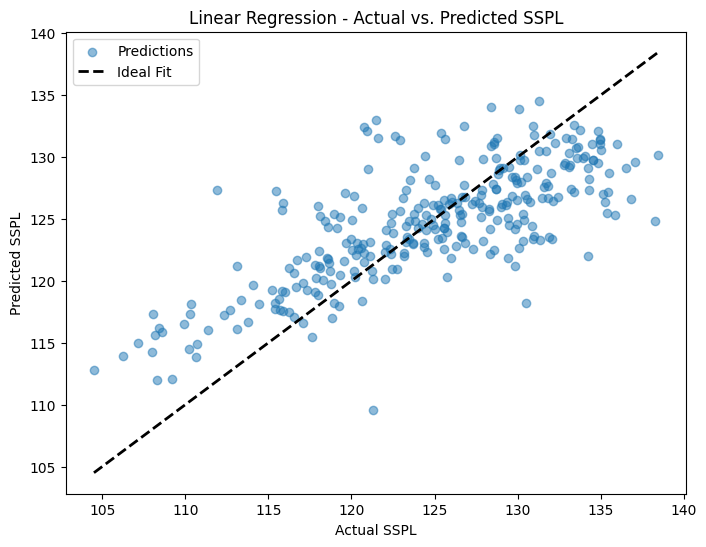

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'SSPL' is the target column
X = df.drop('SSPL', axis=1)
y = df['SSPL']  # Target (SSPL column)

# Split the data into 80% training and 20% testing (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")
print(f"RMSE: {rmse_linear}")
print()

# Plot the predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SSPL')
plt.ylabel('Predicted SSPL')
plt.title('Linear Regression - Actual vs. Predicted SSPL')
plt.legend()
plt.show()

Random Forest - Mean Squared Error: 3.2787235884199353
Random Forest - R-squared: 0.9345545578196172
Random Forest - RMSE: 1.8107246031409456


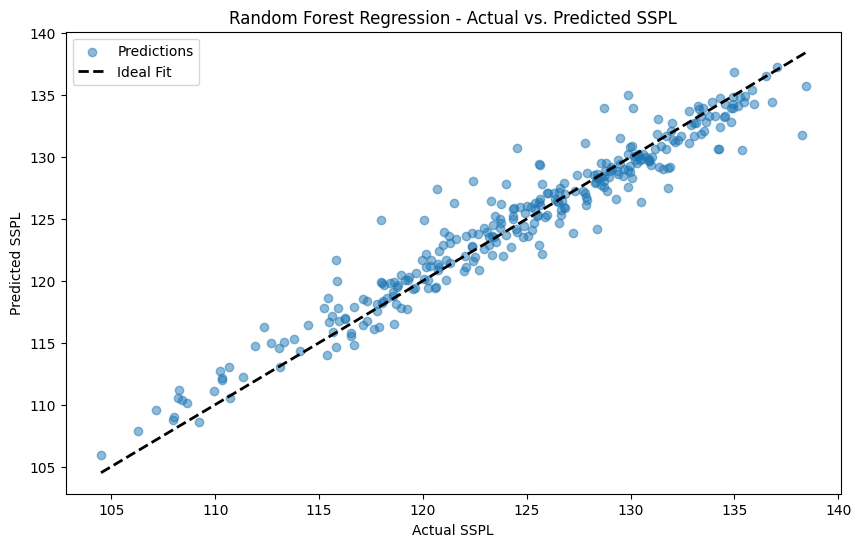

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'SSPL' is the target column
# Split the data into features (X) and target (y)
X = df.drop('SSPL', axis=1)  # Features (all columns except SSPL)
y = df['SSPL']  # Target (SSPL column)

# Split the data into 80% training and 20% testing (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Calculate RMSE

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")

# Plot the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SSPL')
plt.ylabel('Predicted SSPL')
plt.title('Random Forest Regression - Actual vs. Predicted SSPL')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tabulate import tabulate

# Assuming X_train, y_train, X_test, y_test are already defined

# Train and predict with Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)  # Predictions for Linear Regression

# Train and predict with Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)  # Predictions for Random Forest



# Evaluate the Linear model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print(f"Linear - Mean Squared Error: {mse_linear}")
print(f"Linear - R-squared: {r2_linear}")
print(f"Linear - RMSE: {rmse_linear}")

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")



# Define the data for the table
table_data = [
    ["Linear", mse_linear, r2_linear, rmse_linear],
    ["Random Forest", mse_rf, r2_rf, rmse_rf],

]

# Define headers
headers = ["Model", "Mean Squared Error (MSE)", "R-squared (R²)", "Root Mean Squared Error (RMSE)"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Linear - Mean Squared Error: 22.128643318247285
Linear - R-squared: 0.5582979754897284
Linear - RMSE: 4.704109194974888
Random Forest - Mean Squared Error: 3.2787235884199353
Random Forest - R-squared: 0.9345545578196172
Random Forest - RMSE: 1.8107246031409456
+---------------+----------------------------+------------------+----------------------------------+
| Model         |   Mean Squared Error (MSE) |   R-squared (R²) |   Root Mean Squared Error (RMSE) |
+===============+============================+==================+==================================+
| Linear        |                   22.1286  |         0.558298 |                          4.70411 |
+---------------+----------------------------+------------------+----------------------------------+
| Random Forest |                    3.27872 |         0.934555 |                          1.81072 |
+---------------+----------------------------+------------------+----------------------------------+
